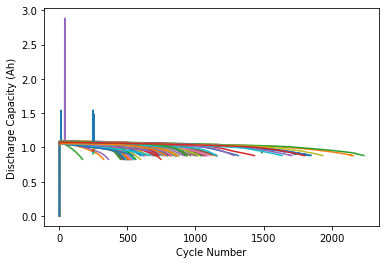

In [2]:
#LoadBatch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
batch1 = pickle.load(open(r'C:\Users\satsin\batch1.pkl', 'rb'))
#remove batteries that do not reach 80% capacity
del batch1['b1c8']
del batch1['b1c10']
del batch1['b1c12']
del batch1['b1c13']
del batch1['b1c22']
numBat1 = len(batch1.keys())
batch2 = pickle.load(open(r'C:\Users\satsin\batch2.pkl','rb'))
# There are four cells from batch1 that carried into batch2, we'll remove the data from batch2
# and put it with the correct cell from batch1
batch2_keys = ['b2c7', 'b2c8', 'b2c9', 'b2c15', 'b2c16']
batch1_keys = ['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4']
add_len = [662, 981, 1060, 208, 482]
for i, bk in enumerate(batch1_keys):
    batch1[bk]['cycle_life'] = batch1[bk]['cycle_life'] + add_len[i]
    for j in batch1[bk]['summary'].keys():
        if j == 'cycle':
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j] + len(batch1[bk]['summary'][j])))
        else:
            batch1[bk]['summary'][j] = np.hstack((batch1[bk]['summary'][j], batch2[batch2_keys[i]]['summary'][j]))
    last_cycle = len(batch1[bk]['cycles'].keys())
    for j, jk in enumerate(batch2[batch2_keys[i]]['cycles'].keys()):
        batch1[bk]['cycles'][str(last_cycle + j)] = batch2[batch2_keys[i]]['cycles'][jk]
del batch2['b2c7']
del batch2['b2c8']
del batch2['b2c9']
del batch2['b2c15']
del batch2['b2c16']
numBat2 = len(batch2.keys())
batch3 = pickle.load(open(r'C:\Users\satsin\batch3.pkl','rb'))
# remove noisy channels from batch3
del batch3['b3c37']
del batch3['b3c2']
del batch3['b3c23']
del batch3['b3c32']
del batch3['b3c42']
del batch3['b3c43']
numBat3 = len(batch3.keys())
numBat = numBat1 + numBat2 + numBat3
bat_dict = {**batch1, **batch2, **batch3}
for i in bat_dict.keys():
    plt.plot(bat_dict[i]['summary']['cycle'], bat_dict[i]['summary']['QD'])
plt.xlabel('Cycle Number')
plt.ylabel('Discharge Capacity (Ah)')

#Batch_1 = pd.DataFrame(data=batch1)
#Batch_1.to_excel('summary1.xlsx')
#Batch_2 = pd.DataFrame(data=batch2)
#Batch_2.to_excel('summary2.xlsx')
#Batch_3 = pd.DataFrame(data=batch3)
#Batch_3.to_excel('summary3.xlsx')

test_ind = np.hstack((np.arange(0,(numBat1+numBat2),2),83))
train_ind = np.arange(1,(numBat1+numBat2-1),2)
secondary_test_ind = np.arange(numBat-numBat3,numBat)

In [92]:
df = pd.DataFrame(bat_dict)
df.head()

,b1c0,b1c1,b1c2,b1c3,b1c4,b1c5,b1c6,b1c7,b1c9,b1c11,...,b3c33,b3c34,b3c35,b3c36,b3c38,b3c39,b3c40,b3c41,b3c44,b3c45
cycle_life,[[1852.0]],[[2160.0]],[[2237.0]],[[1434.0]],[[1709.0]],[[1074.0]],[[636.0]],[[870.0]],[[1054.0]],[[788.0]],...,[[1284.0]],[[1158.0]],[[1093.0]],[[923.0]],[[1935.0]],[[1156.0]],[[796.0]],[[786.0]],[[940.0]],[[1801.0]]
charge_policy,3.6C(80%)-3.6C,3.6C(80%)-3.6C,3.6C(80%)-3.6C,4C(80%)-4C,4C(80%)-4C,4.4C(80%)-4.4C,4.8C(80%)-4.8C,4.8C(80%)-4.8C,5.4C(40%)-3.6C,5.4C(50%)-3C,...,5C(67%)-4C-newstructure,5.3C(54%)-4C-newstructure,5.6C(19%)-4.6C-newstructure,5.6C(36%)-4.3C-newstructure,5C(67%)-4C-newstructure,5.3C(54%)-4C-newstructure,5.6C(19%)-4.6C-newstructure,5.6C(36%)-4.3C-newstructure,5.3C(54%)-4C-newstructure,4.8C(80%)-4.8C-newstructure
summary,"{'IR': [0.0, 0.016742354, 0.016724309, 0.01668...","{'IR': [0.0, 0.017038831, 0.017009802, 0.01692...","{'IR': [0.0, 0.01686798, 0.016831938, 0.016718...","{'IR': [0.0, 0.016369704, 0.016315572, 0.01632...","{'IR': [0.0, 0.016787428, 0.016740341, 0.01673...","{'IR': [0.0, 0.016437579, 0.016396422, 0.01636...","{'IR': [0.0, 0.017001977, 0.016977131, 0.01693...","{'IR': [0.0, 0.016311171, 0.016267659, 0.01623...","{'IR': [0.0, 0.016978227, 0.01692898, 0.016933...","{'IR': [0.0, 0.016575078, 0.016582273, 0.01658...",...,"{'IR': [0.015608473, 0.015511206, 0.015512635,...","{'IR': [0.01546871, 0.015438841, 0.015394062, ...","{'IR': [0.015503207, 0.01549053, 0.015479395, ...","{'IR': [0.015283138, 0.015267849, 0.015275053,...","{'IR': [0.016009804, 0.015988033, 0.015961975,...","{'IR': [0.015740374, 0.015740704, 0.015716039,...","{'IR': [0.015553804, 0.015561919, 0.015549388,...","{'IR': [0.018552294, 0.01854171, 0.018510165, ...","{'IR': [0.015744392, 0.015722955, 0.015682839,...","{'IR': [0.015778109, 0.015742011, 0.015711647,..."
cycles,"{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...","{'0': {'I': [0, 0], 'Qc': [0, 0], 'Qd': [0, 0]...",...,"{'0': {'I': [0.4446896636363636, 0.74768759999...","{'0': {'I': [0.36538210909090907, 0.6768590727...","{'0': {'I': [0.28115359090909087, 0.6164724181...","{'0': {'I': [0.33352591818181815, 0.7284268454...","{'0': {'I': [0.2911827818181818, 0.54510636363...","{'0': {'I': [0.42202342727272724, 0.5800594, 0...","{'0': {'I': [0.2727786, 0.6122276999999999, 0....","{'0': {'I': [0.3870253090909091, 0.72554848181...","{'0': {'I': [0.4198421090909091, 0.68663163636...","{'0': {'I': [0.5633510272727271, 0.82326021818..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, cycle_life to cycles
Columns: 124 entries, b1c0 to b3c45
dtypes: object(124)
memory usage: 3.9+ KB


In [67]:
df.shape

(4, 124)

In [6]:
df.keys()

Index(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c9',
       'b1c11',
       ...
       'b3c33', 'b3c34', 'b3c35', 'b3c36', 'b3c38', 'b3c39', 'b3c40', 'b3c41',
       'b3c44', 'b3c45'],
      dtype='object', length=124)

In [47]:
x = []
for i in df.keys():
    x.append(i)

In [49]:
len(x)

124

In [51]:
cell = pd.DataFrame(df[i])
cell_1 = cell.transpose()
cell_2 = pd.DataFrame.from_dict({(i,j): cell_1['cycles'][i][j] 
                           for i in cell_1['cycles'].keys() 
                           for j in cell_1['cycles'][i].keys()},
                       orient='index')

In [52]:
cell_2.head()

I  \
b3c45 0  [0.5633510272727271, 0.823260218181818, 1.1768...   
      1  [0.29923179090909086, 0.6077298272727272, 0.91...   
      2  [0.43339816363636363, 0.6967683272727272, 0.91...   
      3  [0.3421575363636364, 0.5209697363636363, 0.741...   
      4  [0.39206070909090907, 0.5606356545454545, 0.74...   

                                                        Qc  \
b3c45 0  [8.2969955e-06, 8.2969955e-06, 8.2969955e-06, ...   
      1  [1.7781397e-06, 1.7781397e-06, 1.7781397e-06, ...   
      2  [4.3214968e-06, 4.3214968e-06, 4.3214968e-06, ...   
      3  [2.1519081e-06, 2.1519081e-06, 2.1519081e-06, ...   
      4  [1.5972218e-07, 1.5972218e-07, 1.5972218e-07, ...   

                                                        Qd  \
b3c45 0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      1  [1.0398862e-08, 1.0398862e-08, 1.0398862e-08, ...   
      2  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      3  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      4  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                     Qdlin  \
b3c45 0  [-0.0002045231697998913, -0.000174457721985757...   
      1  [-0.00036432599950429203, -0.00032821685052013...   
      2  [-0.00019999882711195304, -0.00016685994494615...   
      3  [-0.0003636598981553795, -0.000323606538941793...   
      4  [-0.00024399868119509725, -0.00021321506732079...   

                                                         T  \
b3c45 0  [32.59252437930288, 32.591871022299195, 32.591...   
      1  [32.68352099689842, 32.68287035745671, 32.6822...   
      2  [32.69618975556875, 32.69578857172557, 32.6954...   
      3  [32.74581812665508, 32.744893338351666, 32.743...   
      4  [32.68015737971322, 32.680098472968666, 32.680...   

                                                     Tdlin  \
b3c45 0  [30.868071012835337, 30.86781088919458, 30.867...   
      1  [30.82791482699264, 30.828576198914572, 30.829...   
      2  [30.722978800371237, 30.722987890887918, 30.72...   
      3  [30.677325885088866, 30.677189559633213, 30.67...   
      4  [30.641847554434374, 30.6413492733963, 30.6408...   

                                                         V  \
b3c45 0  [2.1200237, 2.1468554, 2.1908922, 2.2285128, 2...   
      1  [2.1023779, 2.1267414, 2.159771, 2.1938343, 2....   
      2  [2.109746, 2.133667, 2.1584225, 2.1869411, 2.2...   
      3  [2.1065331, 2.1201468, 2.1415043, 2.1725531, 2...   
      4  [2.1110811, 2.1252594, 2.1429338, 2.162878, 2....   

                                                      dQdV  \
b3c45 0  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      1  [0.0, 0.0, 0.0, -0.002897224697240109, -0.0075...   
      2  [-0.01236380129795515, -0.012363801297955149, ...   
      3  [0.0, 0.0, 0.0, -0.00218992430249296, -0.00681...   
      4  [-0.007301846324167908, -0.007301846324167908,...   

                                                         t  
b3c45 0  [0.0, 0.0006399999998393469, 0.001308333333145...  
      1  [0.0, 0.000673333333543269, 0.0012950000001486...  
      2  [0.0, 0.0005383333331944111, 0.001018333333195...  
      3  [0.0, 0.00040500000007644604, 0.00090500000005...  
      4  [0.0, 0.00040500000007644604, 0.00080500000015...

In [113]:
#function to extract all the data for different batches in different sheet cell wise
def cycle(df):
    for i in list(df):
        cell = pd.DataFrame(df[i])
        cell_1 = cell.transpose()
        cell_2 = pd.DataFrame.from_dict({(j,k): cell_1['cycles'][j][k] 
                           for j in cell_1['cycles'].keys() 
                           for k in cell_1['cycles'][i].keys()},
                       orient='index')
        cell_3 =cell_2.apply(lambda col: col.str[0:]) 
        
        #print(cell_3)
        
    return cell_3.shape

In [114]:
cycle(df)

FileCreateError: [Errno 13] Permission denied: 'C:\\Users\\satsin\\Desktop\\Battery life\\Cycle.xlsx'

In [ ]:
count = 1
for i in list(df):
        cell = pd.DataFrame(df[i])
        cell_1 = cell.transpose()
        cell_2 = pd.DataFrame.from_dict({(j,k): cell_1['cycles'][j][k] 
                           for j in cell_1['cycles'].keys() 
                           for k in cell_1['cycles'][i].keys()},
                       orient='index')
        cell_3 =cell_2.apply(lambda col: col.str[0:])
        s_name = 'C:\\Users\\satsin\\Desktop\\Battery life\\Cycle_'+str(count)+'.xlsx'
        cell_3.to_excel(s_name)
        count = count+1

In [ ]:
with open excel_writer():
    i.to_excel(sheet_name= '')

In [95]:
New_list = []
for i in list(df):
    final_list = []
    cell = pd.DataFrame(df[i])
    cell_1 = cell.transpose()
    cell_2 = pd.DataFrame.from_dict({(j,k): cell_1['cycles'][j][k] 
                        for j in cell_1['cycles'].keys() 
                        for k in cell_1['cycles'][i].keys()},
                        orient='index')
    cell_3 =  cell_2.apply(lambda col: col.str[0])
    cell_3.to_dict(orient='records')   
    final_list.append(cell_3)
New_list.append(final_list)
print(len(New_list))

1


In [96]:
New_list

[[                   I            Qc            Qd     Qdlin          T  \
  b3c45 0     0.563351  8.296995e-06  0.000000e+00 -0.000205  32.592524   
        1     0.299232  1.778140e-06  1.039886e-08 -0.000364  32.683521   
        2     0.433398  4.321497e-06  0.000000e+00 -0.000200  32.696190   
        3     0.342158  2.151908e-06  0.000000e+00 -0.000364  32.745818   
        4     0.392061  1.597222e-07  0.000000e+00 -0.000244  32.680157   
  ...              ...           ...           ...       ...        ...   
        1795  0.257839  1.570695e-06  3.072388e-08 -0.000192  34.555433   
        1796  0.259985  1.428380e-06  2.898215e-08 -0.000192  31.620354   
        1797  0.259469  1.523933e-06  2.806345e-09 -0.000194  33.997537   
        1798  0.255422  1.271523e-06  3.026111e-08 -0.000177  32.409572   
        1799  0.302311  1.480038e-06  2.794710e-08 -0.000164  33.738027   
  
                  Tdlin         V      dQdV    t  
  b3c45 0     30.868071  2.120024  0.000000  0

In [24]:
#Summary data extraction:
def summary(df):
    for i in list(df):
        cell = pd.DataFrame(df[i])
        cell_1 = cell.transpose()
        df3 = pd.DataFrame(cell_1['summary'][i])
    return df3.shape

In [ ]:
for i in list(df):
        cell = pd.DataFrame(df[i])
        cell_1 = cell.transpose()
        df3 = pd.DataFrame(cell_1['summary'][i])
        print(df3.shape)

In [26]:
df3.head()

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle
0,0.015778,1.068454,1.068802,32.615140,30.800251,34.506973,11.037985,1.0
1,0.015742,1.069192,1.069549,32.583423,30.786549,34.443512,11.039718,2.0
2,0.015712,1.069926,1.070114,32.589319,30.680435,34.548187,11.037380,3.0
3,0.015698,1.070196,1.070422,32.572895,30.635644,34.512981,11.037245,4.0
4,0.015679,1.070442,1.070618,32.536870,30.620083,34.481216,11.036160,5.0


In [25]:
summary(df)

,IR,QC,QD,Tavg,Tmin,Tmax,chargetime,cycle
0,0.015778,1.068454,1.068802,32.615140,30.800251,34.506973,11.037985,1.0
1,0.015742,1.069192,1.069549,32.583423,30.786549,34.443512,11.039718,2.0
2,0.015712,1.069926,1.070114,32.589319,30.680435,34.548187,11.037380,3.0
3,0.015698,1.070196,1.070422,32.572895,30.635644,34.512981,11.037245,4.0
4,0.015679,1.070442,1.070618,32.536870,30.620083,34.481216,11.036160,5.0
...,...,...,...,...,...,...,...,...
1795,0.017538,0.881796,0.881539,32.532753,30.328932,34.571934,15.404138,1796.0
1796,0.017294,0.881874,0.881441,32.679857,29.591684,35.492989,15.497987,1797.0
1797,0.017605,0.881364,0.880883,32.217071,31.470758,33.999550,16.357937,1798.0
1798,0.017526,0.881120,0.880757,33.035630,29.526152,35.779078,16.046140,1799.0


In [ ]:
y =[]
for i in x:
    b2c22 = pd.DataFrame(df[i])
    b2c22_1 = b2c22.transpose()
    b2c22_2 = pd.DataFrame.from_dict({(i,j): b2c22_1['cycles'][i][j] 
                           for i in b2c22_1['cycles'].keys() 
                           for j in b2c22_1['cycles'][i].keys()},
                       orient='index')
    Qdlin = b2c22_2['Qdlin'][100]-b2c22_2['Qdlin'][10]
    Qdlin1 = pd.DataFrame(Qdlin)
    Cycle = b2c22_1['cycle_life'] 
    print(Cycle,np.var(Qdlin1))

In [83]:
df = pd.DataFrame([[1, 2], [3, 4]], columns=list('AB'), index=['x', 'y'])

In [84]:
df2 = pd.DataFrame([[5, 6], [7, 8]], columns=list('AB'), index=['x', 'y'])

In [85]:
df

,A,B
x,1,2
y,3,4


In [86]:
df2

,A,B
x,5,6
y,7,8


In [89]:
df2.to_dict(orient='records')

[{'A': 5, 'B': 6}, {'A': 7, 'B': 8}]

In [88]:
df.to_dict(orient='records')

[{'A': 1, 'B': 2}, {'A': 3, 'B': 4}]

In [90]:
df.append(df2)

,A,B
x,1,2
y,3,4
x,5,6
y,7,8
